* IRIS FLOWER CLASSIFICATION

Task 1

**  Iris flower has three species; setosa, versicolor, and
virginica, which differs according to their
measurements. Now assume that you have the measurements of the iris flowers according to
their species, and here your task is to train a machine learning model that can learn from the
measurements of the iris species and classify them.

#Description

###Sources:

*  Classify iris plants into three species in this classic dataset
*   **Dataset Link:**https://www.kaggle.com/datasets/saurabh00007/iriscsv


### Problem Statement:

* This is a multiple-classification problem.I built a logistic regression, decision tree classification, and random forest classification, Support Vector Machine” (SVM). The goal is to predict what Species.

###About Dataset

* The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.

* It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

###The columns in this dataset are:

* Id
* SepalLengthCm
* SepalWidthCm
* PetalLengthCm
* PetalWidthCm
* Species

# sepal
* **Iris setosa** has sepal length not greater than 6.0 cm and sepal width not less than 2.3 cm.
* **Iris versicolor** has sepal length not less than 5.0 cm and sepal width not greater than 3.4 cm.
* **Iris virginica** has sepal length not less than 6.0 cm and sepal width not greater than 3.8 cm.

# Import necessary libraries

In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

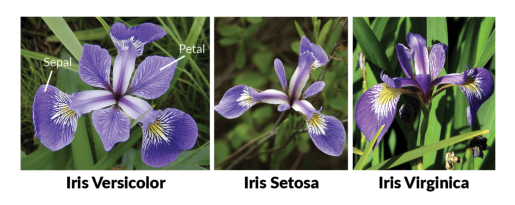

In [54]:
# image file
image = 'iris.png'

# Load and display the image
img = plt.imread(image)
plt.imshow(img)
plt.axis('off')  # Turn off axis labels
plt.show()

In [55]:
# Load the Iris dataset
df=pd.read_csv('Iris.csv')

#Exploratory data analysis(EDA)

In [56]:
#shallow copy
df2=df.copy()

In [57]:
print('The shape of a DataFrame:',df.shape)

The shape of a DataFrame: (150, 6)


In [58]:
print('Display all columns:\n',df.columns)

Display all columns:
 Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


In [59]:
# display top 5 on dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [60]:
# Display the bottom rows
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [61]:
# specific rows of a DataFrame ( "integer location" Method)
df.iloc[100:200]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
100,101,6.3,3.3,6.0,2.5,Iris-virginica
101,102,5.8,2.7,5.1,1.9,Iris-virginica
102,103,7.1,3.0,5.9,2.1,Iris-virginica
103,104,6.3,2.9,5.6,1.8,Iris-virginica
104,105,6.5,3.0,5.8,2.2,Iris-virginica
105,106,7.6,3.0,6.6,2.1,Iris-virginica
106,107,4.9,2.5,4.5,1.7,Iris-virginica
107,108,7.3,2.9,6.3,1.8,Iris-virginica
108,109,6.7,2.5,5.8,1.8,Iris-virginica
109,110,7.2,3.6,6.1,2.5,Iris-virginica


In [62]:
# prints information about the DataFrame.
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB
None


In [63]:
# Display summary statistics for numerical columns in  DataFrame.
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [64]:
# Dispaly (string) columns in the summary statistics.
df.describe(include=object)

,Species
count,150
unique,3
top,Iris-setosa
freq,50


<ipython-input-65-145c8a9e783a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


Text(0.5, 1.0, 'correlation matrix of the columns in the DataFrame')

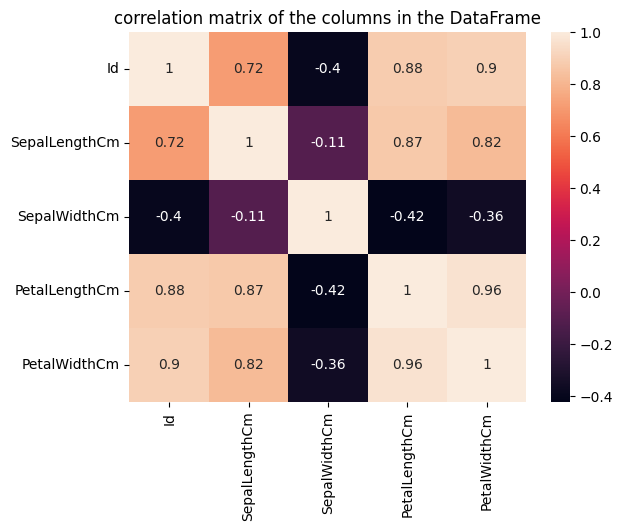

In [65]:
sns.heatmap(df.corr(),annot=True)
plt.title('correlation matrix of the columns in the DataFrame')

# Data cleaning

In [66]:
# Drop the 'Id' column
df=df.drop(columns=['Id'])

In [67]:
print('To check for duplicate values in a DataFrame:',df.duplicated().sum())

To check for duplicate values in a DataFrame: 3


In [68]:
#remove duplication
df=df.drop_duplicates()

In [69]:
print('check after remove dulpication :',df.duplicated().sum())

check after remove dulpication : 0


In [70]:
print('The Number f Missing Values in The df: \n',df.isnull().sum())

The Number f Missing Values in The df: 
 SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64


# Visualization

Text(0.5, 1.0, 'Pie Chart of Species')

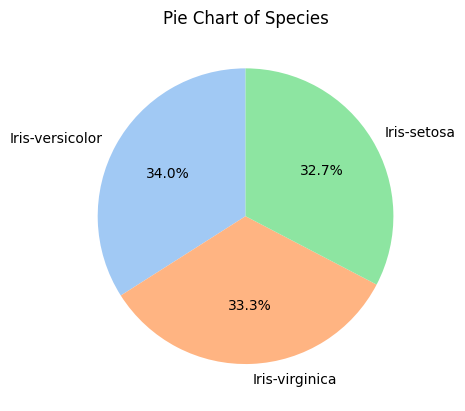

In [71]:
# Get value counts for the 'Species' column
species_counts = df['Species'].value_counts()

# Create a pie chart
plt.pie(species_counts, labels=species_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Pie Chart of Species')

In [72]:
df['Species'].value_counts()

Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

<Figure size 1000x600 with 0 Axes>

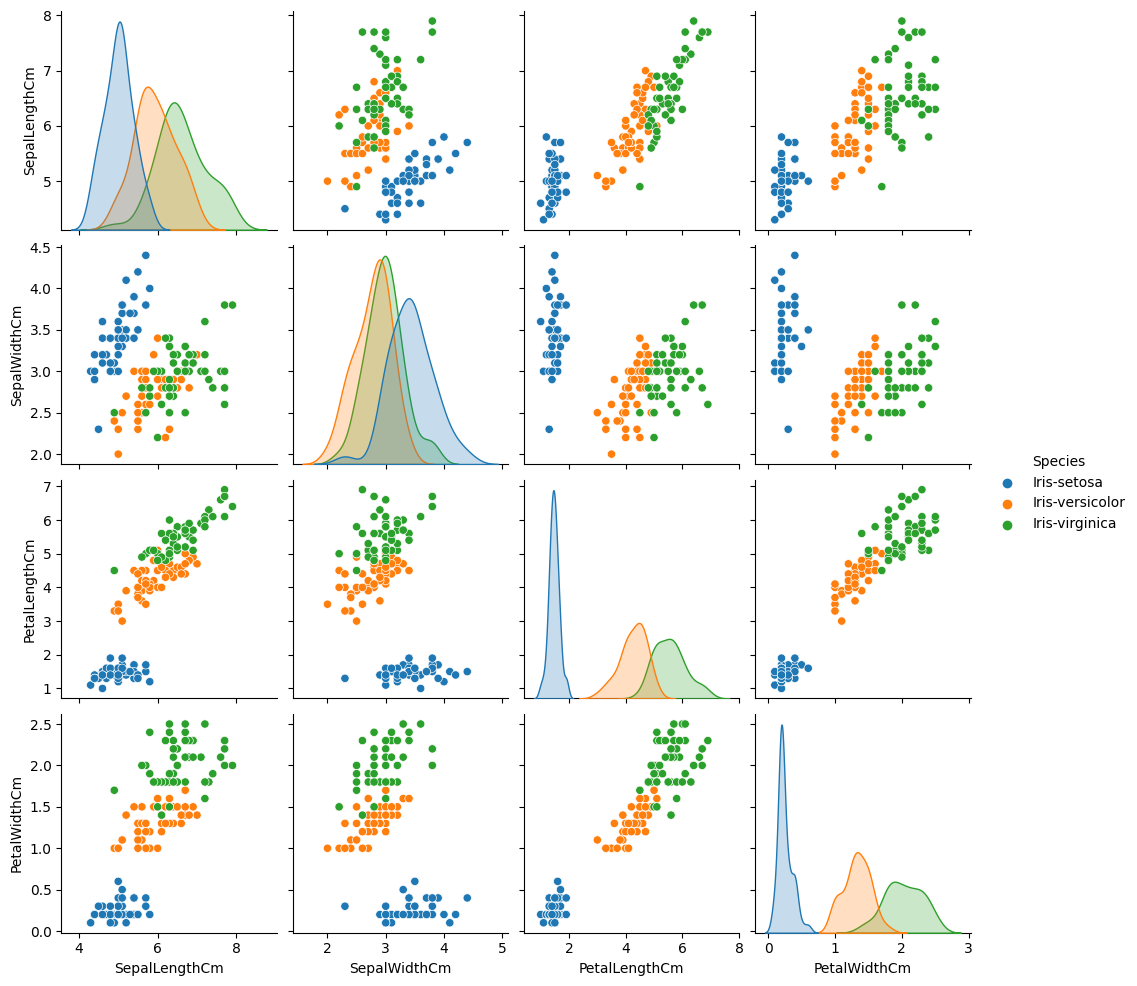

In [73]:
# Pair Plot of Iris Dataset by Species
plt.figure(figsize=(10,6))
sns.pairplot(df,hue='Species')
plt.show()

Text(0.5, 1.0, 'Box Plot of SepalLengthCm by Species')

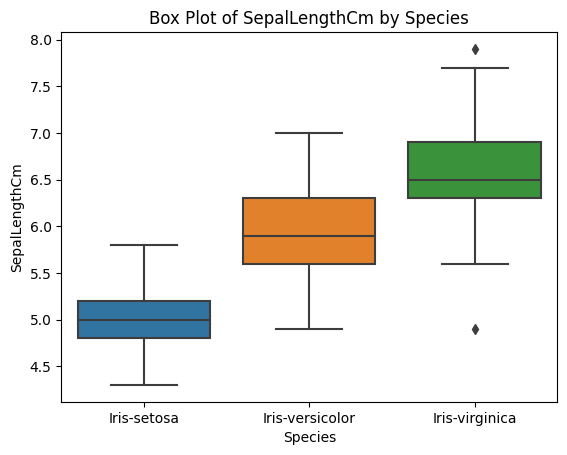

In [74]:
sns.boxplot(x=df['Species'], y=df['SepalLengthCm'])
plt.title(f'Box Plot of SepalLengthCm by Species')

Text(0.5, 1.0, 'Box Plot of SepalwidthCm by Species')

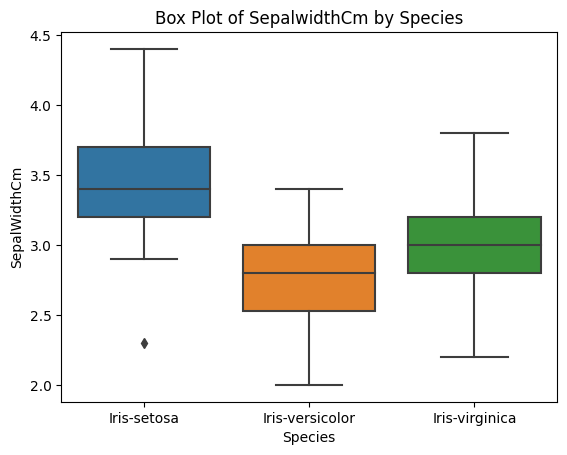

In [75]:
sns.boxplot(x=df['Species'], y=df['SepalWidthCm'])
plt.title('Box Plot of SepalwidthCm by Species')

Text(0.5, 1.0, 'Box Plot of PetalLengthCm by Species')

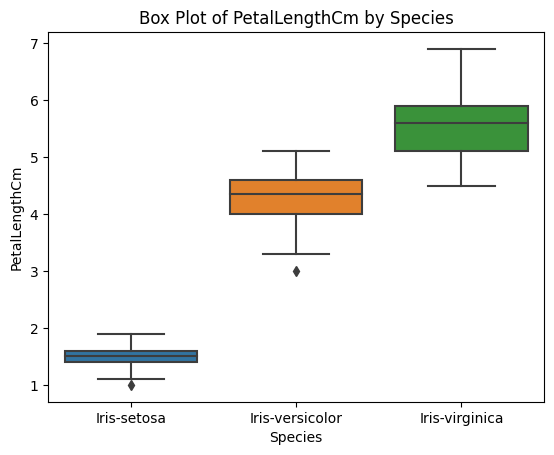

In [76]:
sns.boxplot(x=df['Species'], y=df['PetalLengthCm'])
plt.title('Box Plot of PetalLengthCm by Species')

Text(0.5, 1.0, 'Box Plot of PetalwidthCm by Species')

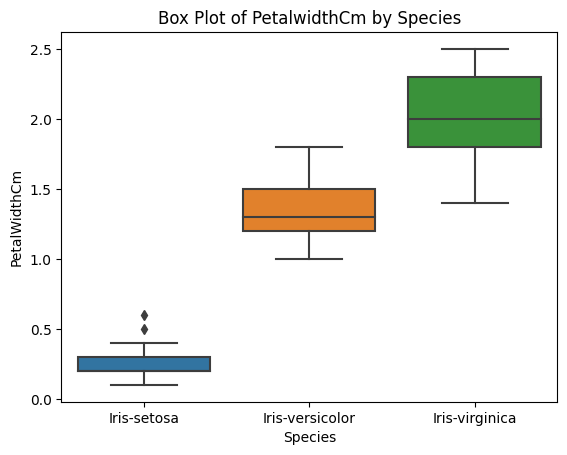

In [77]:
sns.boxplot(x=df['Species'], y=df['PetalWidthCm'])
plt.title('Box Plot of PetalwidthCm by Species')

In [78]:
df.shape

(147, 5)

#Outliers

In [79]:
# Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for outliers
threshold = 1.5

# Identify outliers
outliers = df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]

# Print or handle outliers as needed
print("Outliers:")
outliers.describe()

Outliers:


<ipython-input-79-7ff41e04d6be>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = df.quantile(0.25)
<ipython-input-79-7ff41e04d6be>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = df.quantile(0.75)
<ipython-input-79-7ff41e04d6be>:10: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = df[~((df < (Q1 - threshold * IQR)) | (df > (Q3 + threshold * IQR))).any(axis=1)]


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,143.000000,143.000000,143.000000,143.000000
mean,5.870629,3.038462,3.830769,1.230769
std,0.835045,0.398222,1.750824,0.754538
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [80]:
df=outliers

In [81]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [82]:
df.shape

(143, 5)

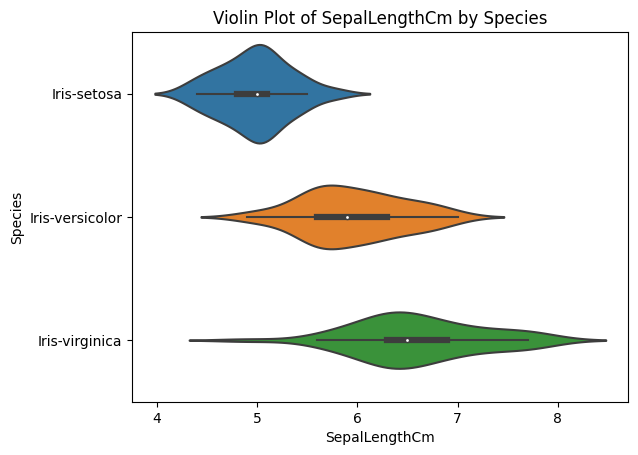

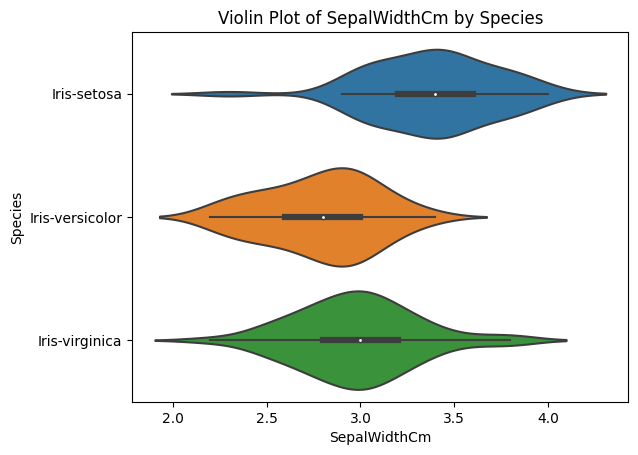

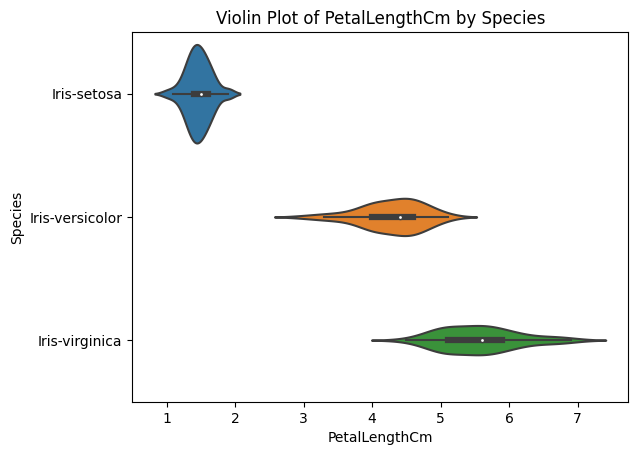

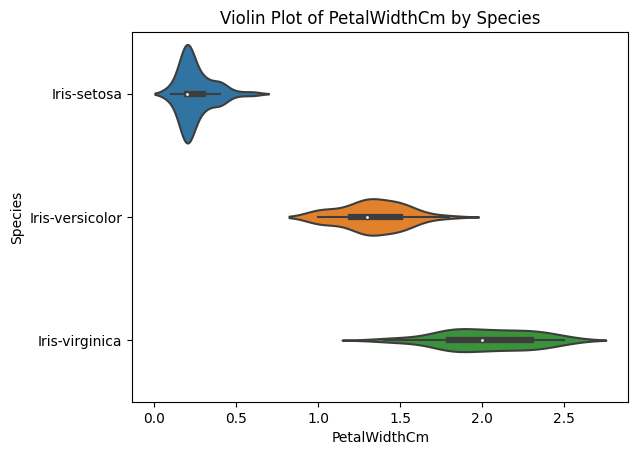

In [83]:
for i in df.columns[:-1]:
  sns.violinplot(y=df['Species'],x=df[i])
  plt.title(f'Violin Plot of {i} by Species')
  plt.show()

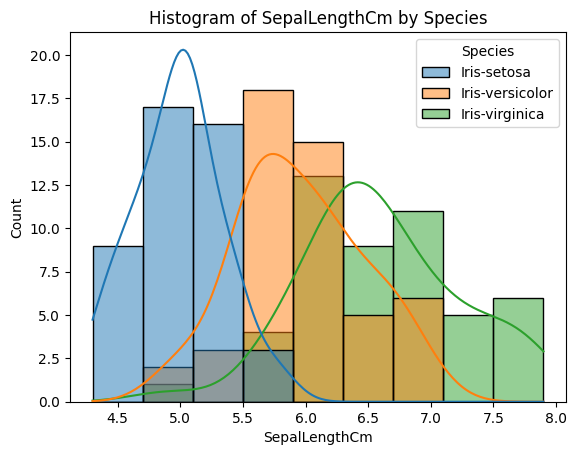

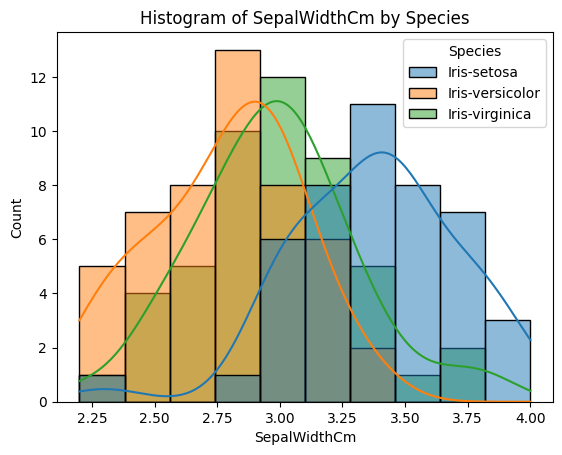

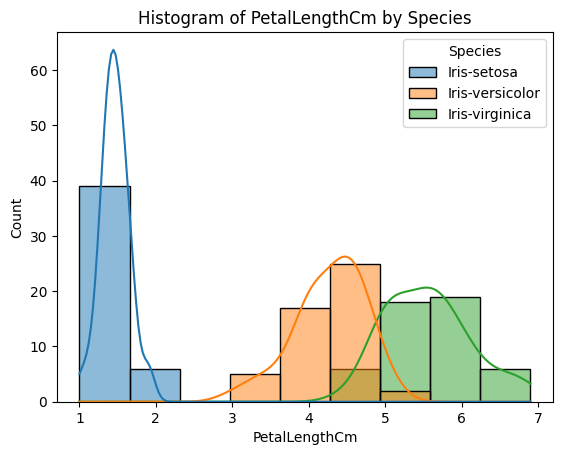

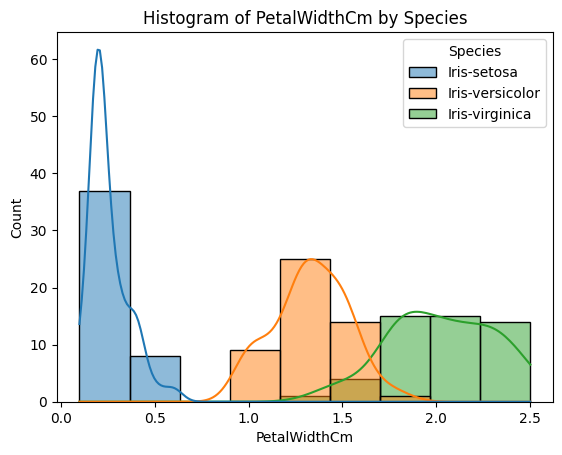

In [84]:
for i in df.columns[:-1]:
    sns.histplot(data=df, x=i, hue='Species', kde=True)
    plt.title(f'Histogram of {i} by Species')
    plt.show()

#LabelEncoder

In [85]:
lb=LabelEncoder()

In [86]:
df['Species']=lb.fit_transform(df['Species'])

# Split x and y

In [87]:
# Split the data into features (X) and target variable (y)

In [88]:
x=df.iloc[ : , : -1]
y=df.iloc[ : , -1]

Display the shape of X and y

In [89]:
x.shape

(143, 4)

In [90]:
y.shape

(143,)

# split training and testing

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Train_and_Evaluate_Model

In [92]:
def train_and_evaluate_model(X_TRAIN,X_TEST,Y_TRAIN,Y_TEST,MODEL):
  MODEL.fit(X_TRAIN,Y_TRAIN)
  Y_PRED_MODEL=MODEL.predict(X_TEST)
  print('classification_report:\n',classification_report(Y_TEST,Y_PRED_MODEL))
  ACCURACY=accuracy_score(Y_TEST,Y_PRED_MODEL)*100
  print('accuracy_score:',ACCURACY)
  print('ERROR Values:',np.mean(Y_PRED_MODEL!=Y_TEST)*100)
  print('confusion_matrix:\n',confusion_matrix(Y_TEST,Y_PRED_MODEL))
  return ACCURACY

##LogisticRegression()

In [93]:
lg=LogisticRegression()

In [94]:
lg_accuracy=train_and_evaluate_model(x_train,x_test,y_train,y_test,lg)

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

accuracy_score: 89.65517241379311
ERROR Values: 10.344827586206897
confusion_matrix:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


##Support vector machine

* Support Vector Machines are a type of supervised machine learning algorithm used for classification and regression. Here's a basic overview of how SVMs work:

1. Input Data:
* SVMs are used for classification and regression tasks. Given a set of labeled training data (input features and corresponding labels), SVM aims to find a hyperplane that best separates the data into different classes.

2. Hyperplane:
* In a binary classification task, the hyperplane is a decision boundary that maximally separates the instances of different classes. The goal is to find the hyperplane with the maximum margin, i.e., the maximum distance between the hyperplane and the nearest data point from each class.

3. Support Vectors:
* The data points that are closest to the hyperplane and have the most influence on its position are called support vectors.

4. Kernel Trick:
* SVMs can handle non-linear decision boundaries by using a kernel function. The kernel function implicitly maps the input data into a higher-dimensional space, making it possible to find a linear hyperplane in that space.

5. Training:
* The training process involves finding the optimal parameters (weights and biases) that define the hyperplane, considering the margin and minimizing classification errors.

6. Prediction:
* Once the SVM is trained, it can be used to classify new, unseen data by determining which side of the hyperplane the data point falls on.

In [95]:
svm=SVC(kernel='linear')

In [96]:
svm_accuracy=train_and_evaluate_model(x_train,x_test,y_train,y_test,svm)

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        29
   macro avg       0.97      0.97      0.97        29
weighted avg       0.97      0.97      0.97        29

accuracy_score: 96.55172413793103
ERROR Values: 3.4482758620689653
confusion_matrix:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  0 10]]


##DecisionTreeClassifier

* Step-1: Begin the tree with the root node, says S, which contains the complete dataset.
* Step-2: Find the best attribute in the dataset using Attribute Selection Measure (ASM).
* Step-3: Divide the S into subsets that contains possible values for the best attributes.
* Step-4: Generate the decision tree node, which contains the best attribute.
* Step-5: Recursively make new decision trees using the subsets of the dataset created in step -3.
Continue this process until a stage is reached where you cannot further classify the nodes and
called the final node as a leaf node.

In [97]:
dt=DecisionTreeClassifier(random_state=42)

In [98]:
dt_accuracy=train_and_evaluate_model(x_train,x_test,y_train,y_test,dt)

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

accuracy_score: 89.65517241379311
ERROR Values: 10.344827586206897
confusion_matrix:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


##RandomForestClassifier

In [99]:
rf=RandomForestClassifier(n_estimators=100,random_state=42)

In [100]:
rt_accuracy=train_and_evaluate_model(x_train,x_test,y_train,y_test,rf)

classification_report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.89      0.80      0.84        10

    accuracy                           0.90        29
   macro avg       0.91      0.90      0.90        29
weighted avg       0.90      0.90      0.90        29

accuracy_score: 89.65517241379311
ERROR Values: 10.344827586206897
confusion_matrix:
 [[ 8  0  0]
 [ 0 10  1]
 [ 0  2  8]]


#Comparison of Model Accuracies

Logistic Regression Accuracy: 89.66
SVM Accuracy: 96.55
DecisionTreeClassifier Accuracy: 89.66
RandomForestClassifier Accuracy: 89.66


Text(0.5, 1.0, 'Accuracy Comparison between Models')

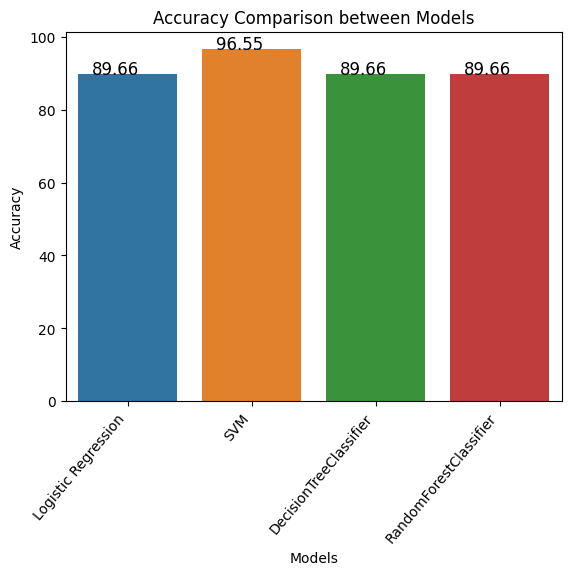

In [101]:
# Create an accuracy comparison graph
models = ['Logistic Regression', 'SVM','DecisionTreeClassifier','RandomForestClassifier']
accuracies = [lg_accuracy, svm_accuracy,dt_accuracy,rt_accuracy]

for name, score in zip(models,accuracies):
  print(f'{name} Accuracy: {score:.2f}')

# Create a bar plot
bars = sns.barplot(x=models, y=accuracies)

# Add text annotations on top of each bar
for bar, score in zip(bars.patches, accuracies):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, height + 0.01, f'{score:.2f}', ha='center', fontsize=12)

# Customize plot
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.xticks(rotation=50, ha='right')
plt.title('Accuracy Comparison between Models')